In [3]:
import nltk
import matplotlib.pyplot as plt
import re
import csv

In [21]:
text = []
label = []
text_cleaned = []
with open("./data/IMDBsentiment/Train.csv", "r", encoding="utf-8") as file: #Read data to the variable text
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        text.append(row[0])
        label.append(row[1])
for x in text:
    filtered_x = re.sub(r'[^\w\s]|[äöüÄÖÜß]', ' ', x)
    lower_x = filtered_x.lower()
    text_cleaned.append(re.sub(' +', ' ', lower_x))
print(len(text))

40000


ever since i heard of the ralph bakshi version of the lord of the rings i wondered what the hell is rotoscope animation well i finally found out i saw this movie about three years ago not having any idea who ralph bakshi is and i liked it a lot very good story line it even has a little character development which is great for a cartoon see it if you get bored with contemporary animation don t get me wrong i m not saying it s just a nice cartoon it s a pretty good movie too 


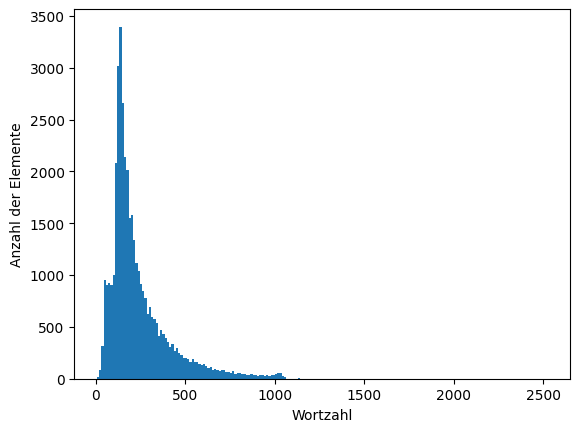

In [20]:
word_counts = []
for x in text_cleaned:
    word_counts.append(len(x.split()))

print(text_cleaned[20])
plt.hist(word_counts, bins=200)
plt.xlabel('Wortzahl')
plt.ylabel('Anzahl der Elemente')
plt.show()

Anzahl für negative Sätze (0) 20019
Anzahl für positive Sätze (1) 19981


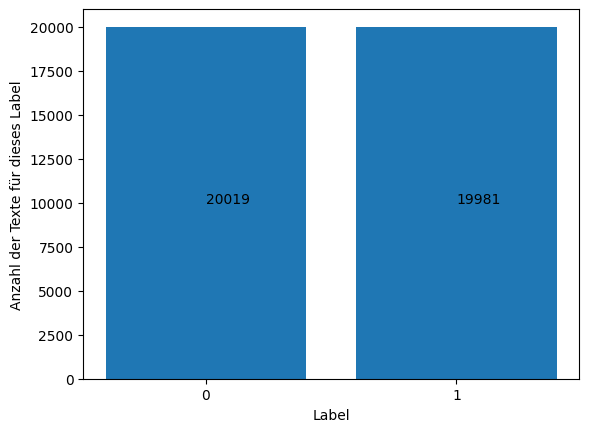

In [106]:
label_counts = []
count_zero = 0
count_one = 0
values = []
for x in label:
    if x == '1':
        count_one = count_one + 1
    if x == '0':
        count_zero = count_zero + 1
values.append(count_one)
values.append(count_zero)
print("Anzahl für negative Sätze (0)",count_zero)
print("Anzahl für positive Sätze (1)",count_one)
plt.text(0, 10000, count_zero)
plt.text(1, 10000, count_one)
plt.bar(['0', '1'], values)
plt.ylabel('Anzahl der Texte für dieses Label')
plt.xlabel('Label')
plt.show()

In [12]:
stopwords = nltk.corpus.stopwords.words('english')#Englische Stopwords laden
stopwords.append('br')
text_cleaned_stopwords = []
word_counts = {}
for x in text_cleaned:
    tokens = nltk.word_tokenize(x)
    filtered_tokens = [token for token in tokens if token not in stopwords]
    for word in filtered_tokens:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [88]:
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts[0:10]:
    print(f'{word}: {count}')

movie: 66975
film: 59410
one: 40851
like: 31325
good: 22980
even: 19724
would: 19224
time: 18657
really: 18436
see: 18006
